In [217]:
import re
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [218]:
newsdata = pd.read_csv("20221123_1.csv")

In [219]:
newsdata.head(19)

,新聞來源,新聞日期,新聞標題,新聞內容
0,自由時報,11月22日,高虹安助理費事件 黃國昌：未有吹哨者與保護協會聯絡,時代力量前黨主席黃國昌今（22日）到高雄為黨籍市議員林于凱助選，被問及最近高虹安助理費事件及...
1,鏡周刊,11月22日,【決戰北桃竹3】高虹安助理費風暴反應兩極 藍白合不合流左右選局,民眾黨新竹市長候選人高虹安，近日遭控涉嫌詐領助理費，打亂先前的選舉步調，民眾黨幕僚直言，助理...
2,新頭殼newtalk,11月22日,四叉貓曝高虹安辦公室小故事 前助理稱｢超愛喝可樂｣：喝不到會生氣,網紅「四叉貓」劉宇多次針對民眾黨與其政治人物在臉書爆料，近期更是將砲火集中對準民眾黨新竹市長...
3,聯合報,11月22日,高虹安助理費爭議 黃國昌：吹哨者沒來跟我接觸,民眾黨新竹市長候選人高虹安助理費事件持續延燒，前時代力量立委黃國昌22日到高雄陪同黨市議員林...
4,三立新聞網,11月22日,高虹安助理得幫做美甲？雞排妹曝跟助理對話截圖：一晚16000、勸這事,網紅「四叉貓」劉宇針對民眾黨立委高虹安助理案相關爭議，21日晚連發18篇文，爆料高虹安立委辦...
5,三立新聞網,11月22日,Jack找助理幫高虹安按摩做水晶指甲？這次王浩宇挺她：均合乎法律,網紅「四叉貓」劉宇21日晚連發18篇文，爆料民眾黨立委高虹安國會辦公室的「小故事」，前助理提...
6,三立新聞網,11月22日,連爆18個高虹安辦公室故事 林智群揭四叉貓單日通告費收入,針對民眾黨新竹市長候選人高虹安助理案相關爭議，網紅「四叉貓」劉宇昨（21）日晚間連發數篇文，...
7,ETTODAY,11月22日,四叉貓夜會高虹安前助理！狂發「辦公室小故事」 網暴動求出書,民眾黨新竹市長候選人高虹安助理費爭議連環爆，網紅「四叉貓」劉宇21日晚間與高虹安三位前助理一...
8,民視新聞,11月22日,高虹安喝不到可樂會生氣？四叉貓揪3助理狂爆料,新竹市長候選人高虹安接連爆出助理費爭議，多次被聲稱是前助理的人士爆出黑料；網紅「四叉貓」劉宇...
9,三立新聞網,11月22日,高虹安助理得幫做美甲？雞排妹曝跟助理對話截圖：一晚16000、勸這事,網紅「四叉貓」劉宇針對民眾黨立委高虹安助理案相關爭議，21日晚連發18篇文，爆料高虹安立委辦...


In [220]:
newsdata["KEYWORD"]=""
newsdata.head()

,新聞來源,新聞日期,新聞標題,新聞內容,KEYWORD
0,自由時報,11月22日,高虹安助理費事件 黃國昌：未有吹哨者與保護協會聯絡,時代力量前黨主席黃國昌今（22日）到高雄為黨籍市議員林于凱助選，被問及最近高虹安助理費事件及...,
1,鏡周刊,11月22日,【決戰北桃竹3】高虹安助理費風暴反應兩極 藍白合不合流左右選局,民眾黨新竹市長候選人高虹安，近日遭控涉嫌詐領助理費，打亂先前的選舉步調，民眾黨幕僚直言，助理...,
2,新頭殼newtalk,11月22日,四叉貓曝高虹安辦公室小故事 前助理稱｢超愛喝可樂｣：喝不到會生氣,網紅「四叉貓」劉宇多次針對民眾黨與其政治人物在臉書爆料，近期更是將砲火集中對準民眾黨新竹市長...,
3,聯合報,11月22日,高虹安助理費爭議 黃國昌：吹哨者沒來跟我接觸,民眾黨新竹市長候選人高虹安助理費事件持續延燒，前時代力量立委黃國昌22日到高雄陪同黨市議員林...,
4,三立新聞網,11月22日,高虹安助理得幫做美甲？雞排妹曝跟助理對話截圖：一晚16000、勸這事,網紅「四叉貓」劉宇針對民眾黨立委高虹安助理案相關爭議，21日晚連發18篇文，爆料高虹安立委辦...,


In [221]:
jieba.load_userdict("20221123_useword.txt") #將字補完整
jieba.analyse.set_stop_words("20221123_noword.txt") #去除不重要的字，要放在同個資料夾
index = 0
for sentence in newsdata["新聞標題"]:#取出表格中的內容
    doct_list=jieba.analyse.extract_tags(sentence,200)#挑出200個最重要的單詞
    newsdata["KEYWORD"].iloc[index]=doct_list#將每個字句的重點單詞放在各個項目之中
    index += 1
newsdata["KEYWORD"]

0                      [吹哨, 高虹安, 助理費, 黃國昌, 保護協會, 聯絡]
1               [決戰, 高虹安, 助理費, 風暴, 反應兩極, 藍白, 選局, 合流]
2                 [四叉貓, 高虹安, 辦公室, 小故事, 愛喝可樂, 生氣, 助理]
3                        [吹哨, 高虹安, 助理費, 爭議, 黃國昌, 接觸]
4                           [助理, 高虹安, 雞排妹, 對話截圖, 美甲]
5                 [Jack, 高虹安, 水晶指甲, 王浩宇, 按摩, 助理, 法律]
6                [高虹安, 辦公室, 林智群, 四叉貓, 單日通告費, 故事, 收入]
7                   [四叉貓, 夜會, 高虹安, 辦公室, 小故事, 暴動, 助理]
8                         [高虹安, 可樂, 生氣, 四叉貓, 爆料, 助理]
9                           [助理, 高虹安, 雞排妹, 對話截圖, 美甲]
10                          [高虹安, 助理費案, 柯文哲, 檢調, 處理]
11                    [新聞, 詐領, 檢察官, 斷言, 高虹安, 助理, 分析]
12    [高虹安, 爭議, 連環, 柯文哲, 國家機器, 林冠年, 民眾黨, 結構, 調整, 爆料]
13                     [高虹安, 助理費案, 柯文哲, 力挺, 張益贍, 身家]
14                 [高虹安, 四叉貓, 年薪百萬, 公積金, 催稿, 深夜, 助理]
15                  [四叉貓, 頻爆, 對話截圖, 高虹安, 提告, 離職, 助理]
16                              [高虹安, 助理費, 案外案, 曾銘宗]
17                [高虹安, 助理費, 爭議延燒, 媒體, 舉動, 貪污嫌疑, 分析]
Name: KEYWORD, dtype: object

In [222]:
Counter(newsdata["新聞日期"]).keys()

dict_keys(['11月22日', '11月20日', '11月21日', '11月18日', '11月16日', '11月11日'])

In [223]:
Counter(newsdata["新聞來源"]).keys()

dict_keys(['自由時報', '鏡周刊', '新頭殼newtalk', '聯合報', '三立新聞網', 'ETTODAY', '民視新聞', '聯合新聞網', '菱傳媒', '放言編輯器', '今日新聞', '新新聞'])

In [224]:
jieba.load_userdict("20221123_useword.txt")
jieba.analyse.set_stop_words("20221123_noword.txt")
newsdata["ARTIWORD"]=""
index = 0
for sentence in newsdata["新聞內容"]:#取出表格中的內容
    doct_list=jieba.analyse.extract_tags(sentence,500)#挑出500個最重要的單詞
    newsdata["ARTIWORD"].iloc[index]=doct_list#將每個字句的重點單詞放在各個項目之中
    index += 1
newsdata["ARTIWORD"]

0     [黃國昌, 吹哨, 聯絡, 處理, 時代力量, 高虹安, 傳言, 台灣, 揭弊, 保護協會,...
1     [高虹安, 民眾黨, 新竹, 助理費案, 林耕仁, 竹市, 選民, 國民黨候選人, 藍白, ...
2     [高虹安, 四叉貓, 辦公室, 助理, 可樂, NCC, 媒體, 網友, 封條, 立委, 民...
3     [吹哨, 黃國昌, 協會, 處理, 詐騙, 市長候選人, 高虹安, 助理費, 問到, 相關,...
4     [助理, 高虹安, 雞排妹, 四叉貓, 辦公室, 旅遊, 立委, 小故事, 愛喝可樂, Ja...
5     [助理, 辦公室, 立委, 四叉貓, 按摩, 高虹安, 小故事, 水晶指甲, 王浩宇, 則說...
6     [四叉貓, 高虹安, 林智群, 律師, 助理, 小故事, 面試, 節目, 爆料, 一整天, ...
7     [高虹安, 辦公室, 四叉貓, 助理, 網友, NCC, 可樂, 小故事, 媒體, 爆料, ...
8     [高虹安, 辦公室, 助理, 四叉貓, NCC, 小故事, 媒體, 小妹, 同仁, 主任, ...
9     [助理, 高虹安, 雞排妹, 旅遊, 立委, 員工, 爆料, 網紅, 四叉貓, 劉宇, 針對...
10    [台灣, 高虹安, 司法, 新竹, 柯文哲, 民眾黨, 助理費案, 批評, 資料, 處理, ...
11    [助理費, 詐領, 議員, 貪污, 判刑, 助理, 高虹安, 檢察官, 高報, 偽造, 10...
12    [高虹安, 林冠年, 民眾黨, 爭議, 助理, 國家機器, 節目, 助理費, 那麼, 實現,...
13    [高虹安, 民眾黨, 柯文哲, 張益贍, 委員, 臉書, 2024, 總統, 身家, 主席,...
14    [高虹安, 助理, 四叉貓, 薪水, 上繳, 公積金, 對話截圖, 改稿, 回應, 爆料, ...
15    [高虹安, 截圖, 質疑, 公積金, 檢調, 助理, 抹黑, 律師, 討論, 違反, 道歉,...
16    [民眾黨, 黨團, 助理, 高虹安, 辦公室, 立委, 立法院, 助理費, 政論, 節目, ...
17    [加班, 高虹安, 逆風, 立委, 助理費, 爭議, 委員, 辦公室, 統籌, 費用

In [225]:
#jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
#sentence為待提取的文本
#topK為返回幾個TF / IDF權重最大的關鍵詞，默認值為20
#withWeight為是否一併返回關鍵詞權重值，默認值為False
#allowPOS僅包括指定詞性的詞，默認值為空，即不篩選,以加""來表示

In [226]:

index=0
for sentence in newsdata["新聞內容"]:
    sentence = re.sub('\d+','',sentence)#re要記得先import，此為資料正則化的功能，去除掉不要的字
    sentence = re.sub('a-z','',sentence)
    doct_list=jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=('ns','nr','n'))#名詞顯示
    newsdata["ARTIWORD"].iloc[index]=doct_list
    index += 1

In [227]:
jieba.load_userdict("20221123_useword.txt")
jieba.analyse.set_stop_words("20221123_noword.txt")
newsdata["ARTIWORD"]

0     [聯絡, 黨籍, 傳言, 台灣, 協會, 沈榮欽, 公益, 案子, 前黨, 市議員, 林于凱...
1     [新竹, 竹市, 選民, 選情, 謝文進, 基層, 過程, 市長, 保論, 地方, 人士, ...
2     [媒體, 網友, 性平, 翁達瑞, 記者, 群組, 員工, 信箱, 爆料, 同仁, 八卦, ...
3     [協會, 高雄, 議員, 林于凱, 弊案, 聯絡, 學者, 名教授, 黨市, 台灣, 高虹案...
4     [員工, 爆料, 網紅, 熱議, 藝人, 樣子, 飲料, 鄭家純, 對話, 地點, 比應徵,...
5     [化妝, 指甲, 行使, 網紅, 國會, 前民, 黨籍, 桃園, 市議員, 情小, 小情, ...
6     [林智群, 政論, 節目, 爆料, 大家, 小姐, 整本, 網紅, 群組, 畫面, 櫻桃, ...
7     [網友, 媒體, 爆料, 網紅, 群組, 信箱, 同仁, 八卦, 畫面, 李忠庭, 高畫, ...
8     [媒體, 小妹, 同仁, 網友, 論文, 記者, 飲用, 群組, 規定, 信箱, 聲稱, 黑...
9     [員工, 爆料, 網紅, 鄭家純, 對話, 地點, 比應徵, 職位, 薪資, 建議, 森活,...
10    [台灣, 司法, 新竹, 資料, 公平, 信任, 疑雲, 終極, 國家, 防線, 市長, 觀...
11    [議員, 文書, 人頭, 低薪, 民代, 市議員, 林武忠, 特權, 刑度, 黨籍, 陳粹鑾...
12    [節目, 周玉蔻, 新竹, 事情, 結構性, 公費, 林為洲, 柚子, 台北市, 爆料, 台...
13    [委員, 身家, 主席, 疑雲, 加碼, 名額, 黨團, 護航力, 態度, 黃珊, 珊梭, ...
14    [薪水, 議員, 爆料, 風波, 網紅, 薪資, 時分, 鏡週刊, 資料, 費大約, 信義,...
15    [建議, 宣董, 綠斑, 綠營用, 價值, 零用金, 司法, 爆料, 故事, 立院, 打草稿...
16    [黨團, 委員, 節目, 曾銘宗, 政論, 配額, 黨部, 事人, 立院, 團則, 聯系, ...
17    [逆風, 委員, 狀況, 費用, 報導, 薪資, 帳戶, 選情, 合法, 文末, 規

In [228]:
newsdata.loc[(newsdata["新聞日期"]=='11月22日')]#查找"相關日期"的新聞

,新聞來源,新聞日期,新聞標題,新聞內容,KEYWORD,ARTIWORD
0,自由時報,11月22日,高虹安助理費事件 黃國昌：未有吹哨者與保護協會聯絡,時代力量前黨主席黃國昌今（22日）到高雄為黨籍市議員林于凱助選，被問及最近高虹安助理費事件及...,"[吹哨, 高虹安, 助理費, 黃國昌, 保護協會, 聯絡]","[聯絡, 黨籍, 傳言, 台灣, 協會, 沈榮欽, 公益, 案子, 前黨, 市議員, 林于凱..."
1,鏡周刊,11月22日,【決戰北桃竹3】高虹安助理費風暴反應兩極 藍白合不合流左右選局,民眾黨新竹市長候選人高虹安，近日遭控涉嫌詐領助理費，打亂先前的選舉步調，民眾黨幕僚直言，助理...,"[決戰, 高虹安, 助理費, 風暴, 反應兩極, 藍白, 選局, 合流]","[新竹, 竹市, 選民, 選情, 謝文進, 基層, 過程, 市長, 保論, 地方, 人士, ..."
2,新頭殼newtalk,11月22日,四叉貓曝高虹安辦公室小故事 前助理稱｢超愛喝可樂｣：喝不到會生氣,網紅「四叉貓」劉宇多次針對民眾黨與其政治人物在臉書爆料，近期更是將砲火集中對準民眾黨新竹市長...,"[四叉貓, 高虹安, 辦公室, 小故事, 愛喝可樂, 生氣, 助理]","[媒體, 網友, 性平, 翁達瑞, 記者, 群組, 員工, 信箱, 爆料, 同仁, 八卦, ..."
3,聯合報,11月22日,高虹安助理費爭議 黃國昌：吹哨者沒來跟我接觸,民眾黨新竹市長候選人高虹安助理費事件持續延燒，前時代力量立委黃國昌22日到高雄陪同黨市議員林...,"[吹哨, 高虹安, 助理費, 爭議, 黃國昌, 接觸]","[協會, 高雄, 議員, 林于凱, 弊案, 聯絡, 學者, 名教授, 黨市, 台灣, 高虹案..."
4,三立新聞網,11月22日,高虹安助理得幫做美甲？雞排妹曝跟助理對話截圖：一晚16000、勸這事,網紅「四叉貓」劉宇針對民眾黨立委高虹安助理案相關爭議，21日晚連發18篇文，爆料高虹安立委辦...,"[助理, 高虹安, 雞排妹, 對話截圖, 美甲]","[員工, 爆料, 網紅, 熱議, 藝人, 樣子, 飲料, 鄭家純, 對話, 地點, 比應徵,..."
5,三立新聞網,11月22日,Jack找助理幫高虹安按摩做水晶指甲？這次王浩宇挺她：均合乎法律,網紅「四叉貓」劉宇21日晚連發18篇文，爆料民眾黨立委高虹安國會辦公室的「小故事」，前助理提...,"[Jack, 高虹安, 水晶指甲, 王浩宇, 按摩, 助理, 法律]","[化妝, 指甲, 行使, 網紅, 國會, 前民, 黨籍, 桃園, 市議員, 情小, 小情, ..."
6,三立新聞網,11月22日,連爆18個高虹安辦公室故事 林智群揭四叉貓單日通告費收入,針對民眾黨新竹市長候選人高虹安助理案相關爭議，網紅「四叉貓」劉宇昨（21）日晚間連發數篇文，...,"[高虹安, 辦公室, 林智群, 四叉貓, 單日通告費, 故事, 收入]","[林智群, 政論, 節目, 爆料, 大家, 小姐, 整本, 網紅, 群組, 畫面, 櫻桃, ..."
7,ETTODAY,11月22日,四叉貓夜會高虹安前助理！狂發「辦公室小故事」 網暴動求出書,民眾黨新竹市長候選人高虹安助理費爭議連環爆，網紅「四叉貓」劉宇21日晚間與高虹安三位前助理一...,"[四叉貓, 夜會, 高虹安, 辦公室, 小故事, 暴動, 助理]","[網友, 媒體, 爆料, 網紅, 群組, 信箱, 同仁, 八卦, 畫面, 李忠庭, 高畫, ..."
8,民視新聞,11月22日,高虹安喝不到可樂會生氣？四叉貓揪3助理狂爆料,新竹市長候選人高虹安接連爆出助理費爭議，多次被聲稱是前助理的人士爆出黑料；網紅「四叉貓」劉宇...,"[高虹安, 可樂, 生氣, 四叉貓, 爆料, 助理]","[媒體, 小妹, 同仁, 網友, 論文, 記者, 飲用, 群組, 規定, 信箱, 聲稱, 黑..."
9,三立新聞網,11月22日,高虹安助理得幫做美甲？雞排妹曝跟助理對話截圖：一晚16000、勸這事,網紅「四叉貓」劉宇針對民眾黨立委高虹安助理案相關爭議，21日晚連發18篇文，爆料高虹安立委辦...,"[助理, 高虹安, 雞排妹, 對話截圖, 美甲]","[員工, 爆料, 網紅, 鄭家純, 對話, 地點, 比應徵, 職位, 薪資, 建議, 森活,..."


In [229]:
newsdata.to_csv("20221129HW.csv",index=False) #將現有的資料存檔

In [230]:
words = list(newsdata["新聞來源"])#將表格KEYWORD內容轉成LIST,只能抓取簡單的表單單一內容
sh_key=pd.DataFrame(Counter(words).keys())#抓取WORD表單中的關鍵字
sh_val=pd.DataFrame(Counter(words).values())#抓取次數

In [231]:
df=[sh_key,sh_val]
result=pd.concat(df,axis=1)#增加第一列
result.columns=["媒體","次數"]
result

,媒體,次數
0,自由時報,1
1,鏡周刊,1
2,新頭殼newtalk,3
3,聯合報,1
4,三立新聞網,4
5,ETTODAY,1
6,民視新聞,1
7,聯合新聞網,2
8,菱傳媒,1
9,放言編輯器,1


In [232]:
#資料視覺化1
import plotly.express as px
import pandas as pd
px.bar(result,x="媒體",y="次數",title="採用媒體的篇幅數")

In [233]:
#如果資料沒有先整理過就要用HISTOGRAM
px.histogram(newsdata,x="新聞日期",color="新聞來源",title="採用媒體的篇幅數")

In [216]:
newsdata_seg_list=newsdata['ARTIWORD'].tolist()#將其集中為一個子集
type(newsdata_seg_list)

list

In [88]:
newsdata_seg_list#準備進行整併

[['聯絡',
  '黨籍',
  '傳言',
  '台灣',
  '協會',
  '沈榮欽',
  '公益',
  '案子',
  '前黨',
  '市議員',
  '林于凱',
  '宣董',
  '指導棋',
  '弊案',
  '資料',
  '耳語',
  '報紙',
  '辦案',
  '委員',
  '身力'],
 ['新竹',
  '竹市',
  '選民',
  '選情',
  '謝文進',
  '基層',
  '過程',
  '市長',
  '保論',
  '地方',
  '人士',
  '形象',
  '團隊',
  '節奏',
  '細節',
  '風暴',
  '論文',
  '資策',
  '藍營',
  '造勢'],
 ['媒體',
  '網友',
  '性平',
  '翁達瑞',
  '記者',
  '群組',
  '員工',
  '信箱',
  '爆料',
  '同仁',
  '八卦',
  '皮皮',
  '理性',
  '網紅',
  '數篇貼',
  '議論',
  '李忠庭',
  '樣子',
  '薪資屬本',
  '辦營業'],
 ['協會',
  '高雄',
  '議員',
  '林于凱',
  '弊案',
  '聯絡',
  '學者',
  '名教授',
  '黨市',
  '台灣',
  '高虹案',
  '藍綠白',
  '政黨',
  '資料',
  '傳言',
  '耳語',
  '新聞報',
  '辦案',
  '高紅安',
  '加碼'],
 ['員工',
  '爆料',
  '網紅',
  '熱議',
  '藝人',
  '樣子',
  '飲料',
  '鄭家純',
  '對話',
  '地點',
  '比應徵',
  '職位',
  '薪資',
  '建議',
  '森活',
  '新竹',
  '事情',
  '薪水',
  '男友',
  '山野'],
 ['化妝',
  '指甲',
  '行使',
  '網紅',
  '國會',
  '前民',
  '黨籍',
  '桃園',
  '市議員',
  '情小',
  '小情',
  '小愛',
  '樣子',
  '空氣',
  '警衛',
  '法律',
  '爆料',
  '薪水',
  '八卦',
  '故事'],
 ['林智群',
  '政論

In [89]:
flat=[x for sublist in newsdata_seg_list for x in sublist]#將所有清單進行整併
diction=Counter(flat)

In [91]:
diction_key=pd.DataFrame(diction.keys())
diction_value=pd.DataFrame(diction.values())
df=[diction_key,diction_value]
result=pd.concat(df,axis=1)#增加第一列
result.columns=["關鍵字","次數"]
result

,關鍵字,次數
0,聯絡,2
1,黨籍,4
2,傳言,2
3,台灣,3
4,協會,2
...,...,...
239,實用性,1
240,不分區,1
241,項目,1
242,費算,1


In [92]:
result.describe()#平均出現次數

,次數
count,244.000000
mean,1.475410
std,1.163315
min,1.000000
25%,1.000000
50%,1.000000
75%,1.250000
max,10.000000


In [96]:
#px.bar(result[(result["次數"]>3)].sort_values(by=["次數"],ascending=False) 做不出來

SyntaxError: unexpected EOF while parsing (3952463812.py, line 1)

In [97]:
#文字云的套件
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [100]:
mask=np.array(Image.open("ntnu_icon.png"))#載入文字云的圖形與文字
font="C:\Windows\Fonts\MSJH.TTC"

In [101]:
wordcloud=WordCloud(background_color="gray",font_path=font,mask=mask)#設定背景顏色，字體與遮罩
wordcloud.generate_from_frequencies(diction)

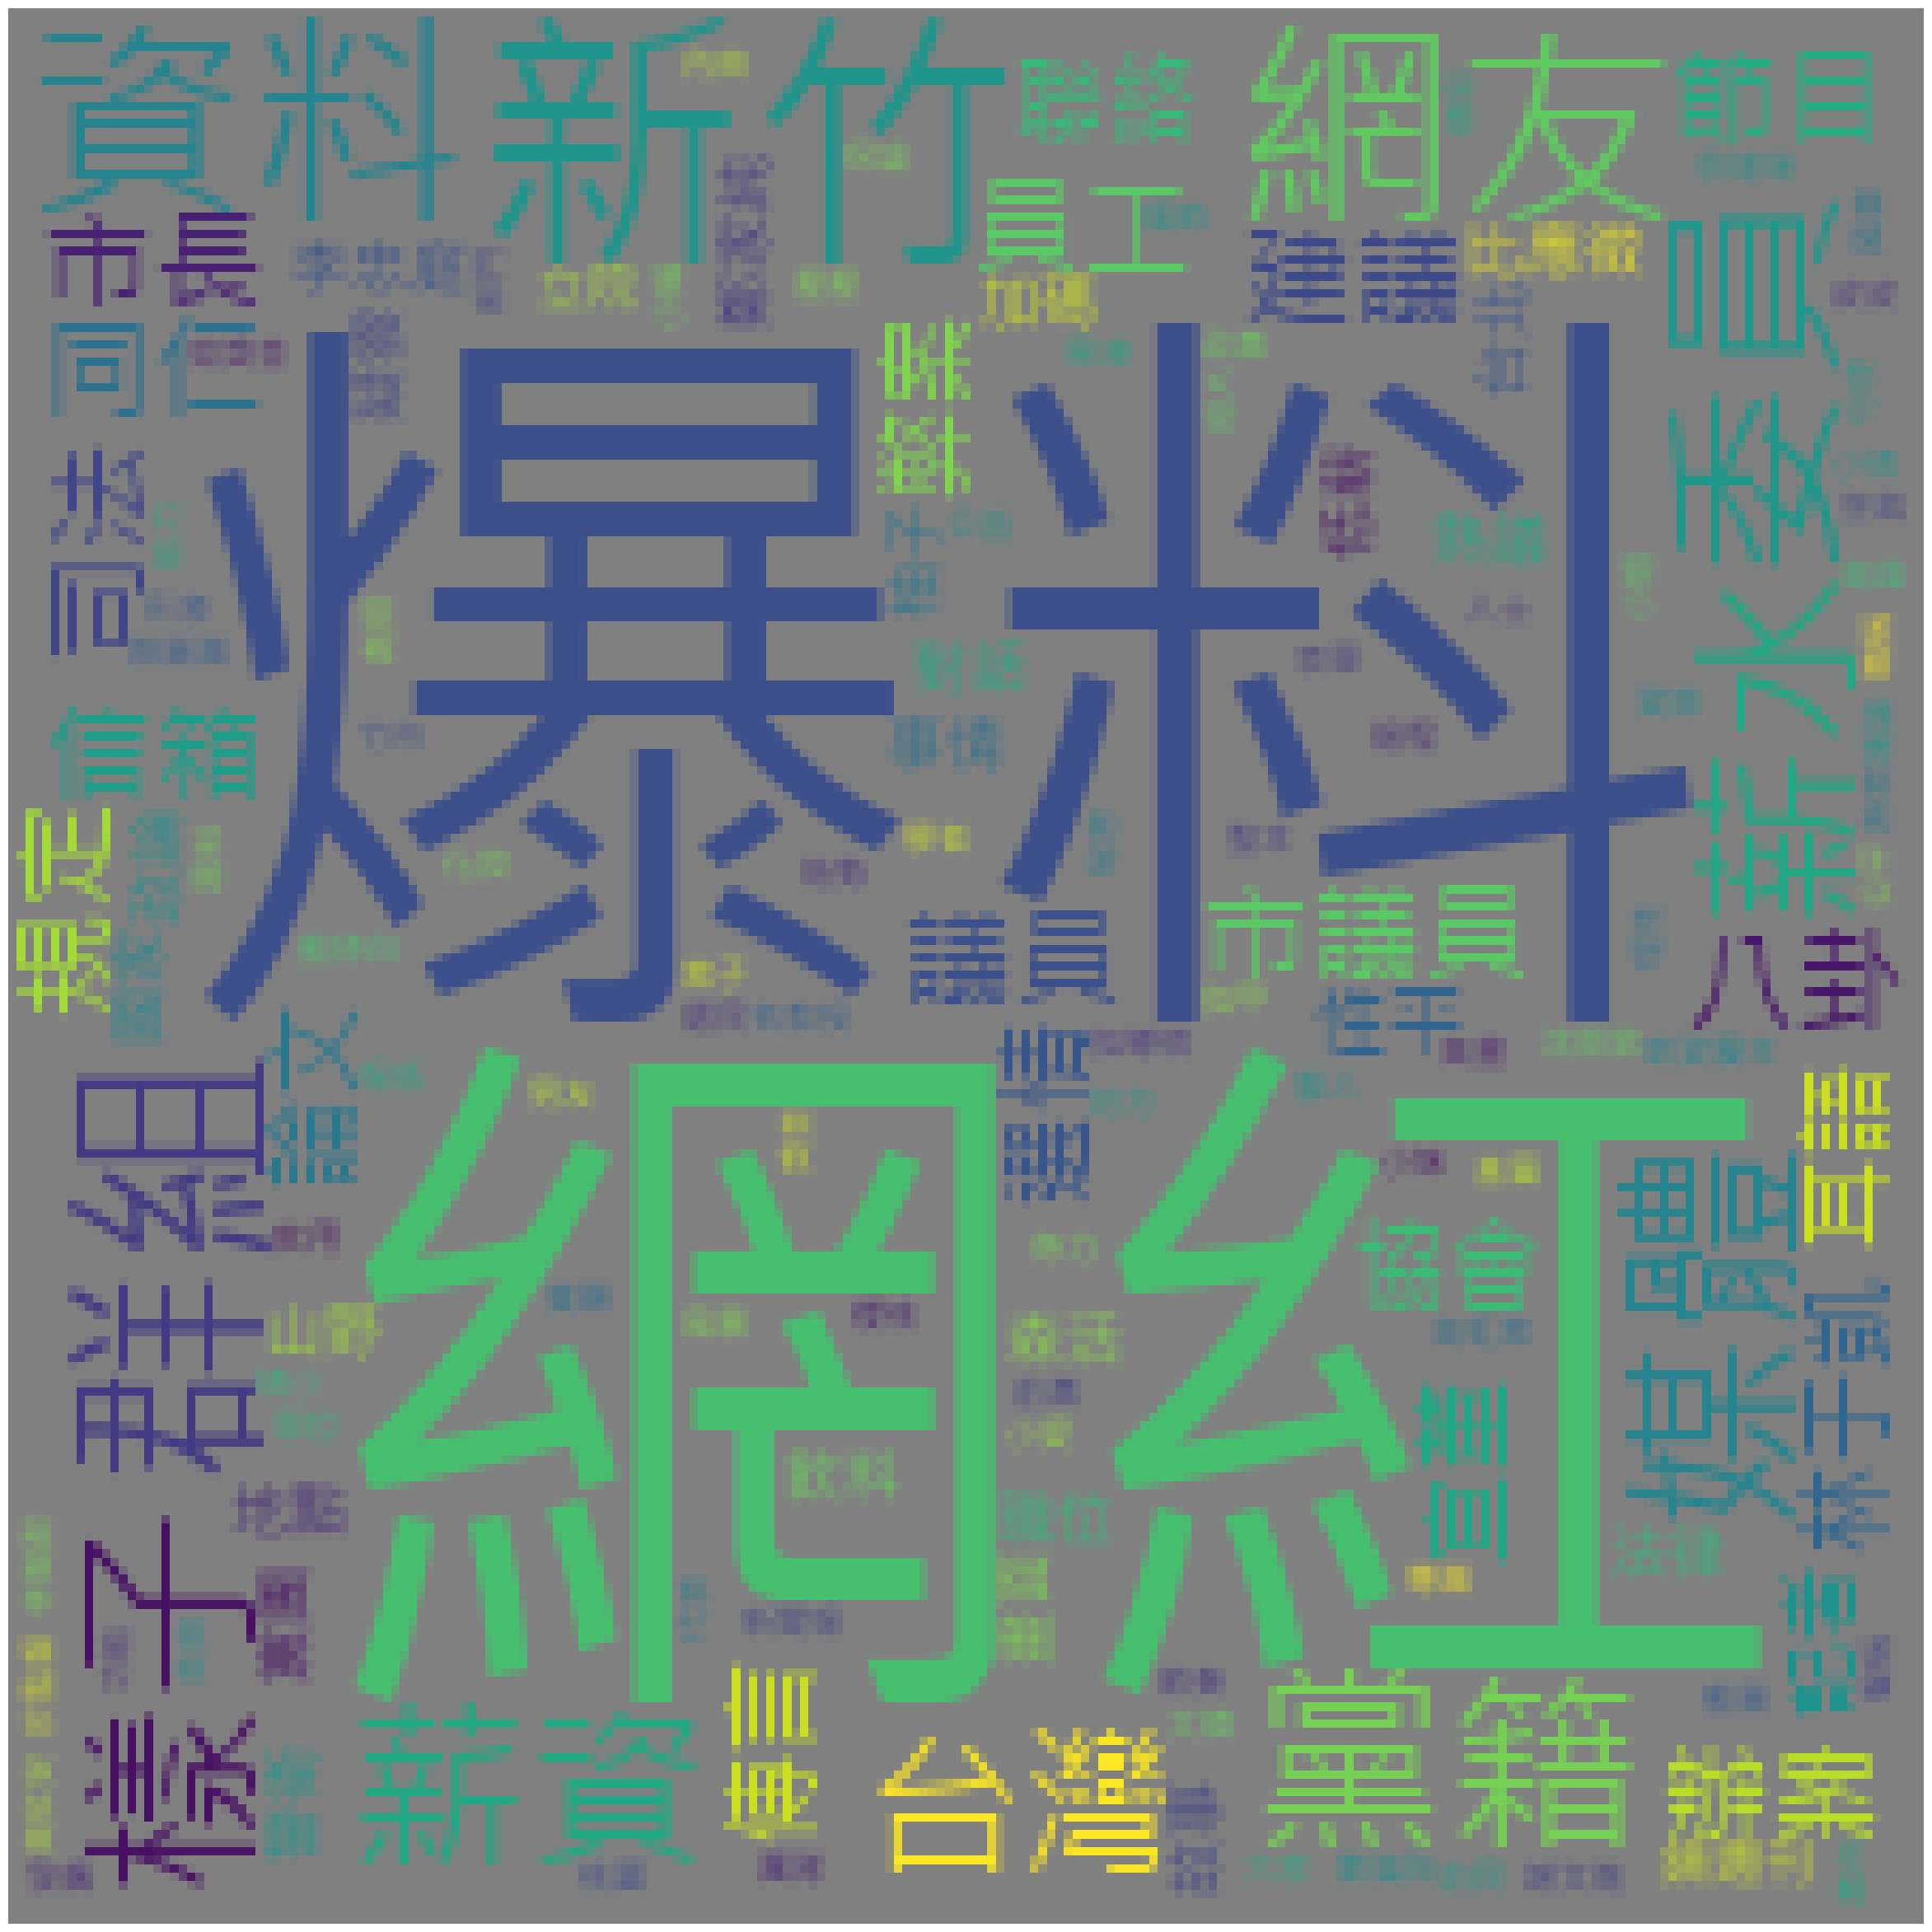

In [103]:
plt.figure(figsize=(30,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#貢獻性分析(線性代數)
#將兩個陣列 轉置前跟轉置後就可以知道他們的貢獻性
#做出矩陣 轉置矩陣 就可以做出共線圖

In [139]:
trydata=newsdata[["新聞來源","新聞內容","ARTIWORD"]]
trydata

,新聞來源,新聞內容,ARTIWORD
0,自由時報,時代力量前黨主席黃國昌今（22日）到高雄為黨籍市議員林于凱助選，被問及最近高虹安助理費事件及...,"[聯絡, 黨籍, 傳言, 台灣, 協會, 沈榮欽, 公益, 案子, 前黨, 市議員, 林于凱..."
1,鏡周刊,民眾黨新竹市長候選人高虹安，近日遭控涉嫌詐領助理費，打亂先前的選舉步調，民眾黨幕僚直言，助理...,"[新竹, 竹市, 選民, 選情, 謝文進, 基層, 過程, 市長, 保論, 地方, 人士, ..."
2,新頭殼newtalk,網紅「四叉貓」劉宇多次針對民眾黨與其政治人物在臉書爆料，近期更是將砲火集中對準民眾黨新竹市長...,"[媒體, 網友, 性平, 翁達瑞, 記者, 群組, 員工, 信箱, 爆料, 同仁, 八卦, ..."
3,聯合報,民眾黨新竹市長候選人高虹安助理費事件持續延燒，前時代力量立委黃國昌22日到高雄陪同黨市議員林...,"[協會, 高雄, 議員, 林于凱, 弊案, 聯絡, 學者, 名教授, 黨市, 台灣, 高虹案..."
4,三立新聞網,網紅「四叉貓」劉宇針對民眾黨立委高虹安助理案相關爭議，21日晚連發18篇文，爆料高虹安立委辦...,"[員工, 爆料, 網紅, 熱議, 藝人, 樣子, 飲料, 鄭家純, 對話, 地點, 比應徵,..."
5,三立新聞網,網紅「四叉貓」劉宇21日晚連發18篇文，爆料民眾黨立委高虹安國會辦公室的「小故事」，前助理提...,"[化妝, 指甲, 行使, 網紅, 國會, 前民, 黨籍, 桃園, 市議員, 情小, 小情, ..."
6,三立新聞網,針對民眾黨新竹市長候選人高虹安助理案相關爭議，網紅「四叉貓」劉宇昨（21）日晚間連發數篇文，...,"[林智群, 政論, 節目, 爆料, 大家, 小姐, 整本, 網紅, 群組, 畫面, 櫻桃, ..."
7,ETTODAY,民眾黨新竹市長候選人高虹安助理費爭議連環爆，網紅「四叉貓」劉宇21日晚間與高虹安三位前助理一...,"[網友, 媒體, 爆料, 網紅, 群組, 信箱, 同仁, 八卦, 畫面, 李忠庭, 高畫, ..."
8,民視新聞,新竹市長候選人高虹安接連爆出助理費爭議，多次被聲稱是前助理的人士爆出黑料；網紅「四叉貓」劉宇...,"[媒體, 小妹, 同仁, 網友, 論文, 記者, 飲用, 群組, 規定, 信箱, 聲稱, 黑..."
9,三立新聞網,網紅「四叉貓」劉宇針對民眾黨立委高虹安助理案相關爭議，21日晚連發18篇文，爆料高虹安立委辦...,"[員工, 爆料, 網紅, 鄭家純, 對話, 地點, 比應徵, 職位, 薪資, 建議, 森活,..."


In [190]:
newsdata["ARTIWORD"] = newsdata["ARTIWORD"].tolist
type(newsdata["ARTIWORD"])
#output_series=trydata.groupby(["新聞內容"])["ARTIWORD"].apply(lambda x:','.join(str(x))).reset_index()

pandas.core.series.Series

In [189]:
output_series

,新聞內容,ARTIWORD
0,新竹市長候選人高虹安接連爆出助理費爭議，多次被聲稱是前助理的人士爆出黑料；網紅「四叉貓」劉宇...,"8, , , , ,[,媒,體,,, ,小,妹,,, ,同,仁,,, ,網,友,,, ,論,..."
1,時代力量前黨主席黃國昌今（22日）到高雄為黨籍市議員林于凱助選，被問及最近高虹安助理費事件及...,"0, , , , ,[,聯,絡,,, ,黨,籍,,, ,傳,言,,, ,台,灣,,, ,協,..."
2,民眾黨新竹市長候選人、立委高虹安的助理費風波不斷，網紅四叉貓(劉宇)今(16)日爆料，高虹安...,"1,4, , , , ,[,薪,水,,, ,議,員,,, ,爆,料,,, ,風,波,,, ,..."
3,民眾黨新竹市長候選人高虹安助理費事件持續延燒，前時代力量立委黃國昌22日到高雄陪同黨市議員林...,"3, , , , ,[,協,會,,, ,高,雄,,, ,議,員,,, ,林,于,凱,,, ,..."
4,民眾黨新竹市長候選人高虹安助理費爭議事件不只被指控涉詐領助理費，還衍生出要求助理上繳款項至公...,"1,2, , , , ,[,節,目,,, ,周,玉,蔻,,, ,新,竹,,, ,事,情,,,..."
5,民眾黨新竹市長候選人高虹安助理費爭議連環爆，網紅「四叉貓」劉宇21日晚間與高虹安三位前助理一...,"7, , , , ,[,網,友,,, ,媒,體,,, ,爆,料,,, ,網,紅,,, ,群,..."
6,民眾黨新竹市長候選人高虹安涉詐領助理費爭議延燒，昨日又有自稱前高虹安助理的人士在政論節目上爆...,"1,6, , , , ,[,黨,團,,, ,委,員,,, ,節,目,,, ,曾,銘,宗,,,..."
7,民眾黨新竹市長候選人高虹安近期深陷助理費案疑雲，民眾黨主席柯文哲至今仍力挺高虹安。民眾黨前中...,"1,3, , , , ,[,委,員,,, ,身,家,,, ,主,席,,, ,疑,雲,,, ,..."
8,民眾黨新竹市長候選人高虹安遭爆詐領助理費，在大選前投下震撼彈！有檢察官比對國內過去案例，鐵口...,"1,1, , , , ,[,議,員,,, ,文,書,,, ,人,頭,,, ,低,薪,,, ,..."
9,民眾黨新竹市長候選人高虹安陷入助理費案疑雲，民眾黨主席柯文哲說，還是希望司法是公平的、是可以...,"1,0, , , , ,[,台,灣,,, ,司,法,,, ,新,竹,,, ,資,料,,, ,..."
